<a href="https://colab.research.google.com/github/vidhidoshi20/Coolor/blob/main/Task_2_Prediction_Using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation
Vidhi Girish Doshi : Data Science and Business Analytics Intern #GripFebruary2022


Task 2 : Prediction Using Unsupervised Machine Learning


Aim : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
IDE : Google Colab

Programming Language : Python

Dataset Used : [Iris ](https://bit.ly/3kXTdox)





Algorithm : KNN

About Iris Dataset : 

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). The dataset is often used in data mining, classification and clustering examples and to test algorithms.



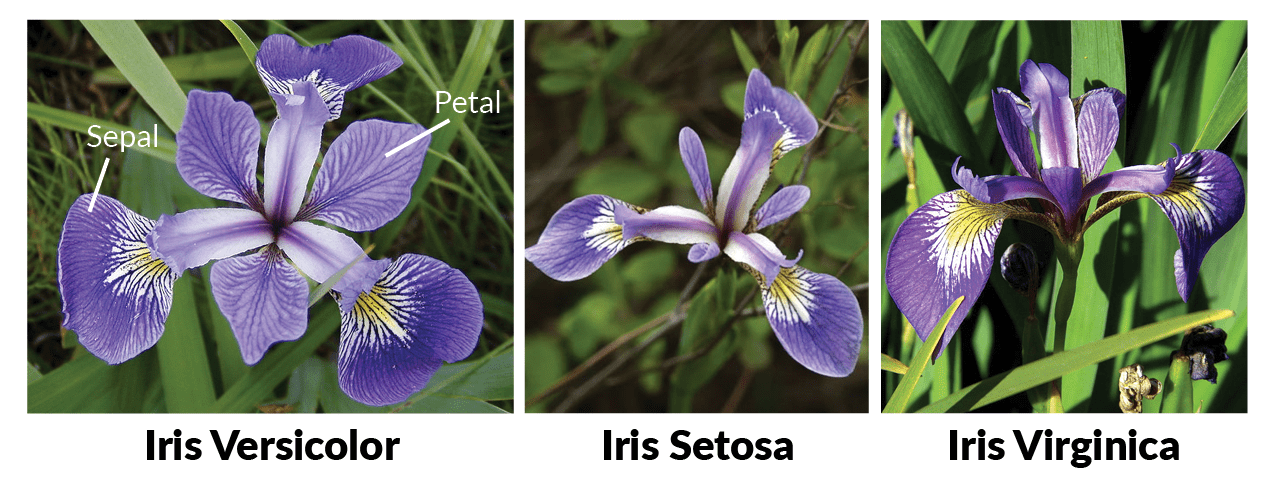








About KNN Algorithm : 

K-nearest neighbors (KNN) classification


1.   Pick a value for K.
2.   Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.

3.   Use the most popular response value from the K nearest neighbors as the predicted response value for the unknown iris.







Importing Libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans

Loading the Iris Dataset

In [8]:
iris = datasets.load_iris()
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [7]:
# See the first 5 rows
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


How do you find the optimum number of clusters for K Means? How does one determine the value of K?

In [13]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
iris_df.info() #Information of datatypes and statistical calculations of each attribute are obtained

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [16]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


To find number of Clusters (k) - Using Elbow Method

To determine the right (optimal) number of Clusters (k - value), we use ' Elbow Method '.

Here, We graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS), then we select the number of clusters where the change in WCSS begins to level off.

( WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid. )

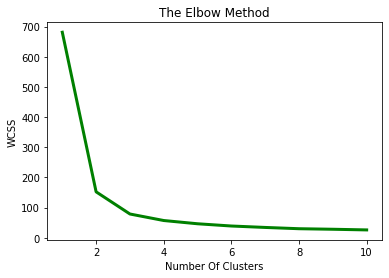

In [18]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss , color = "green" , linewidth = 3)
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

Since it is observed,that the WCSS begins to level off from number of clusters of value 3, so we take k = 3.


Creating the K-means Classifier

In [10]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Plotting the Clusters

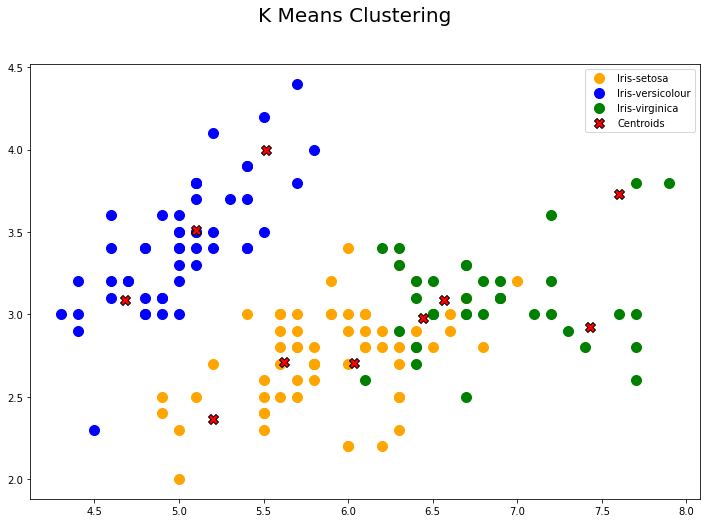

In [34]:
# Visualising the clusters - On the first two columns
fig = plt.figure(figsize = (12, 8))

plt.suptitle("K Means Clustering",fontsize=20)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids',edgecolors = 'black',marker= 'X')

plt.legend(loc = 'upper right')
plt.show()

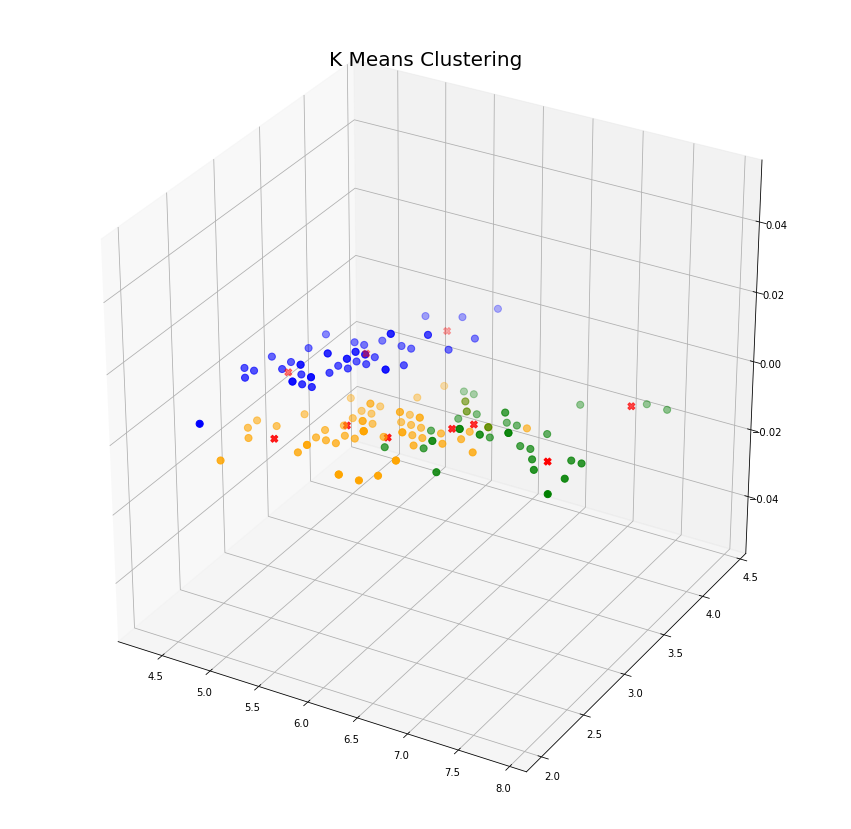

In [39]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.title("K Means Clustering",fontsize=20)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids' ,marker = 'X')
plt.show()

In the plot, we can see the resulted centroids of the three species clusters.

Using the centroid values, we can be able to predict the resulting Iris species for the given Sepal and Petal - Length and Width values.